In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [104]:
data = pd.read_csv("C:/Users/User/Desktop/Artificial-Intelligence-Assignment/assets/aqi/data.csv")

In [105]:
data.shape

(28474, 16)

In [106]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [107]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,23920.000000,17465.000000,25011.000000,24966.000000,24330.000000,18335.000000,26452.000000,24674.000000,24526.000000,22964.000000,20635.000000,11239.000000,23894.000000
mean,69.095223,121.578966,17.857667,28.959424,32.737994,23.894052,2.306848,14.758950,34.519763,3.310998,8.918763,3.063745,170.145811
std,65.389862,90.987310,22.585057,24.655411,31.809871,26.087108,7.088831,18.442412,21.763107,16.001572,20.241362,6.356428,142.084468
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,29.937500,59.900000,5.760000,11.982500,12.900000,8.710000,0.520000,5.640000,18.872500,0.150000,0.710000,0.140000,83.000000
50%,50.215000,98.820000,10.080000,22.110000,23.910000,16.170000,0.905000,9.220000,30.835000,1.120000,3.100000,0.980000,121.000000
75%,82.557500,152.970000,20.450000,38.050000,40.807500,30.445000,1.470000,15.560000,45.540000,3.160000,9.360000,3.340000,215.000000
max,949.990000,1000.000000,351.300000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [108]:
data.isnull().sum()

City              0
Date              0
PM2.5          4554
PM10          11009
NO             3463
NO2            3508
NOx            4144
NH3           10139
CO             2022
SO2            3800
O3             3948
Benzene        5510
Toluene        7839
Xylene        17235
AQI            4580
AQI_Bucket     4580
dtype: int64

In [109]:
data.drop(["City"],axis=1,inplace=True)

In [110]:
data.drop(["Date"],axis=1,inplace=True)

In [111]:
data.drop(["AQI_Bucket"],axis=1,inplace=True)

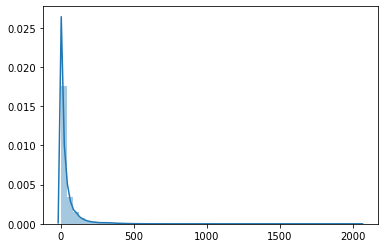

In [112]:
sns.distplot(data)

plt.show()

<bound method DataFrame.count of             PM2.5       PM10     NO    NO2        NOx        NH3    CO    SO2  \
0      123.460000  194.76000  25.13  44.28  45.940000  39.190000  1.22  15.38   
1       86.620000  121.91451   4.51   7.69   4.830000  24.288205  1.10  42.66   
2       24.220000   79.10000  36.41  30.02  66.430000  24.288205  1.36  21.32   
3       51.280000  121.91451   6.61  14.26  32.792496  24.288205  1.15   4.08   
4      121.120000  121.91451   3.33   5.85  32.792496  24.288205  0.81   9.51   
...           ...        ...    ...    ...        ...        ...   ...    ...   
23889    9.750000   37.86000   7.21  11.87   6.080000   3.360000  0.13   6.13   
23890   46.670000  121.91451  12.22  16.74  28.970000  24.288205  1.05  11.76   
23891  118.380000  487.77000  44.64  49.86  65.680000  32.160000  1.41  13.52   
23892   42.900000  121.91451  14.79  13.88  32.792496  24.288205  0.21   8.44   
23893   69.120397  194.56000  11.01  15.38  26.390000   9.960000  0.00   6.7

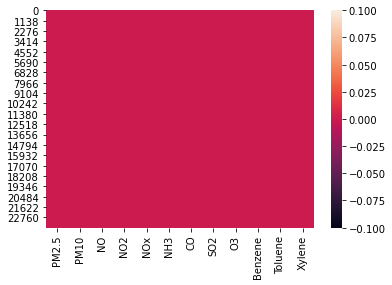

In [136]:
sns.heatmap(data.isnull())
data.count

In [113]:
data.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
1,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN
2,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN
3,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN
4,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN


In [114]:
data.isnull().sum()

PM2.5       4554
PM10       11009
NO          3463
NO2         3508
NOx         4144
NH3        10139
CO          2022
SO2         3800
O3          3948
Benzene     5510
Toluene     7839
Xylene     17235
AQI         4580
dtype: int64

In [115]:
data = data[data['AQI'].notna()]

In [116]:
data.isnull().sum()

PM2.5        675
PM10        6994
NO           316
NO2          359
NOx         1851
NH3         6411
CO           442
SO2          588
O3           770
Benzene     3456
Toluene     5684
Xylene     14599
AQI            0
dtype: int64

In [117]:
data = data.fillna(data.mean())

In [118]:
data.isnull().sum()

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [119]:
data.dtypes

PM2.5      float64
PM10       float64
NO         float64
NO2        float64
NOx        float64
NH3        float64
CO         float64
SO2        float64
O3         float64
Benzene    float64
Toluene    float64
Xylene     float64
AQI        float64
dtype: object

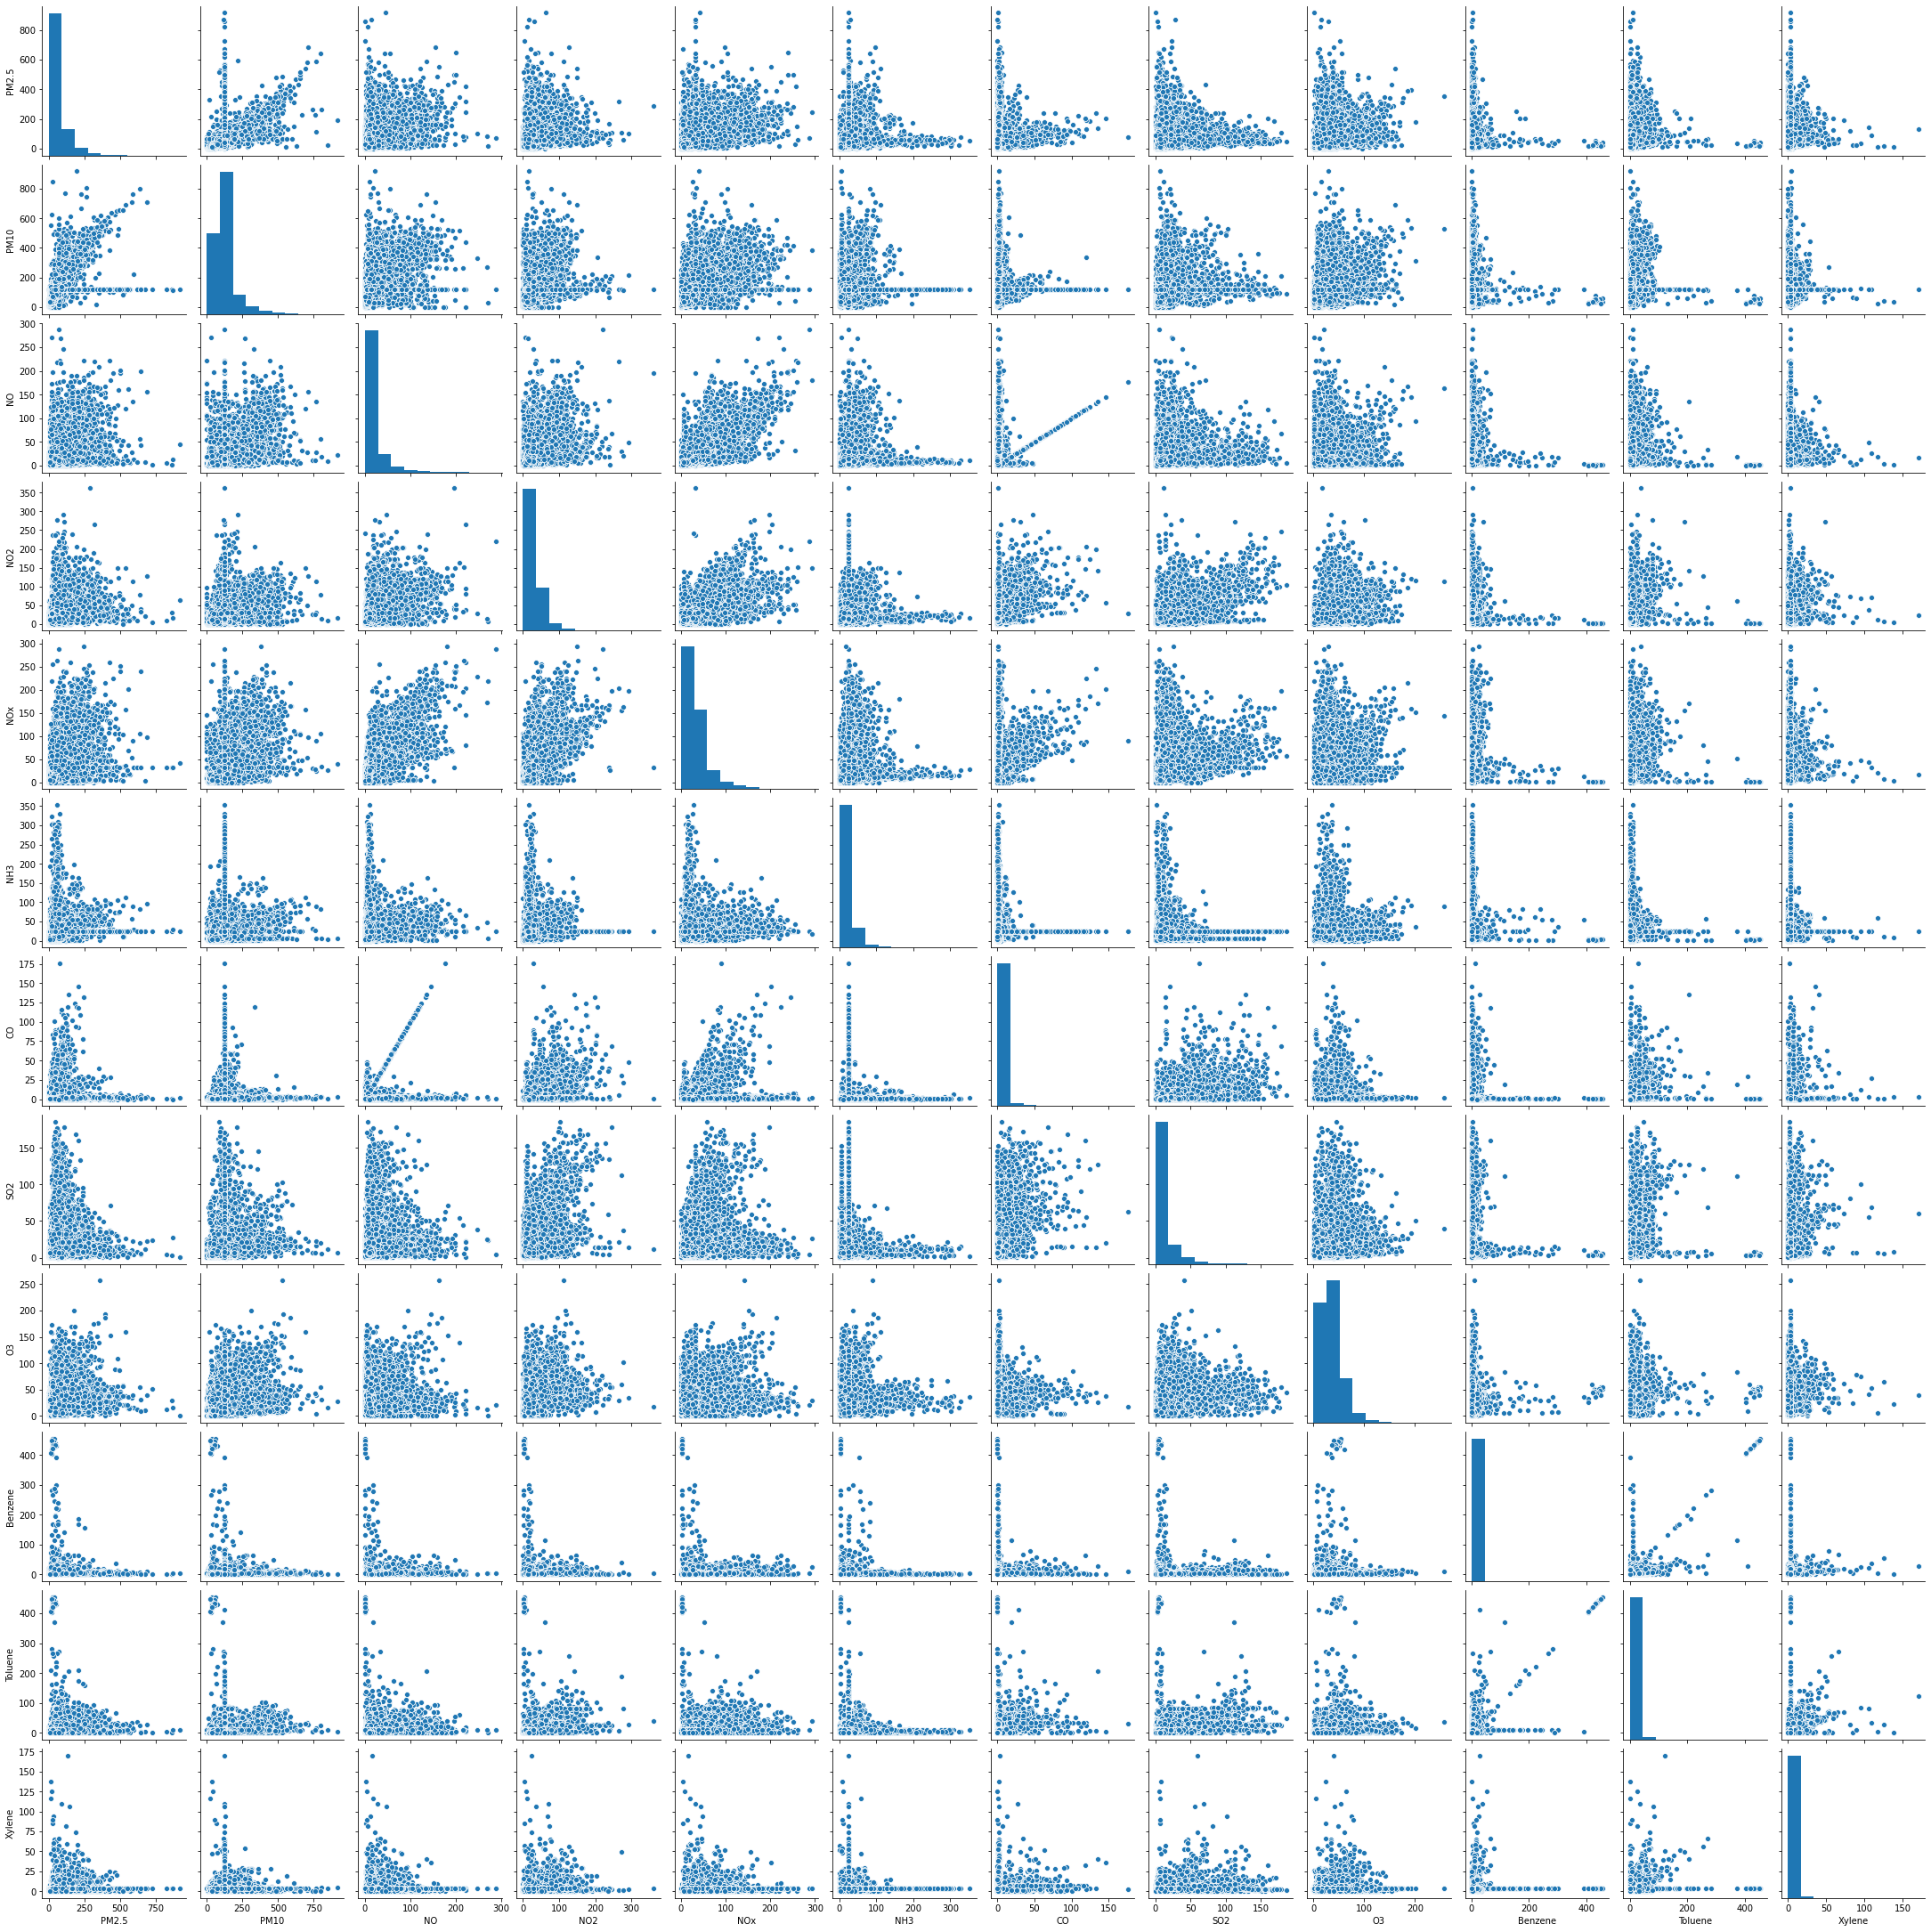

In [137]:
sns.pairplot(data)

In [120]:
from sklearn.utils import shuffle

In [121]:
data = shuffle(data, random_state=0)
data = data.reset_index(drop=True)

In [122]:
y = data["AQI"]
y.head()

0    275.0
1    214.0
2     90.0
3     97.0
4    276.0
Name: AQI, dtype: float64

In [123]:
x = data
x.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,123.46,194.76000,25.13,44.28,45.940000,39.190000,1.22,15.38,28.15,3.64,24.500000,2.020000,275.0
1,86.62,121.91451,4.51,7.69,4.830000,24.288205,1.10,42.66,47.42,6.56,62.010000,25.770000,214.0
2,24.22,79.10000,36.41,30.02,66.430000,24.288205,1.36,21.32,39.09,0.62,9.791377,3.591175,90.0
3,51.28,121.91451,6.61,14.26,32.792496,24.288205,1.15,4.08,17.81,1.39,2.930000,3.591175,97.0
4,121.12,121.91451,3.33,5.85,32.792496,24.288205,0.81,9.51,36.44,0.04,3.980000,3.591175,276.0


In [124]:
x.drop(["AQI"],axis=1,inplace=True)

In [125]:
x.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,123.46,194.76000,25.13,44.28,45.940000,39.190000,1.22,15.38,28.15,3.64,24.500000,2.020000
1,86.62,121.91451,4.51,7.69,4.830000,24.288205,1.10,42.66,47.42,6.56,62.010000,25.770000
2,24.22,79.10000,36.41,30.02,66.430000,24.288205,1.36,21.32,39.09,0.62,9.791377,3.591175
3,51.28,121.91451,6.61,14.26,32.792496,24.288205,1.15,4.08,17.81,1.39,2.930000,3.591175
4,121.12,121.91451,3.33,5.85,32.792496,24.288205,0.81,9.51,36.44,0.04,3.980000,3.591175


In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
scaler = StandardScaler()
print(scaler.fit(data))

StandardScaler()


In [128]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
model = LinearRegression()

In [131]:
model.fit(X_train, y_train)

LinearRegression()

In [138]:
print("Accuracy : ", model.score(X_test, y_test) * 100)

Accuracy :  82.55192882808893


In [144]:
prediction = model.predict(X_test)

In [145]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 31.05106133738723
MSE: 3130.6290934005083
RMSE: 55.9520249267219
